**Проект: Статистический анализ данных**

**Описание проекта**

В нашем распоряжении данные о пользователях популярного сервиса аренды самокатов GoFast. Нам необходимо проанализировать данные о поездках, пользователях и подписках, чтобы выявить ключевые тренды и проверить несколько гипотез, которые помогут бизнесу расти.

**Цель исследования:**

- Изучить поведение пользователей: Анализируя данные о поездках, понять, как часто и как долго пользователи пользуются сервисом, какие расстояния преодолевают и т.д.
- Сравнить пользователей с разными типами подписки: Оценить, как отличаются пользователи с подпиской и без нее по различным параметрам (частота поездок, продолжительность, расстояния).
- Оценить эффективность подписки Ultra: Проверить гипотезы о том, приносят ли пользователи с подпиской больше выручки, чаще ли они пользуются сервисом и т.д.
- Выявить оптимальные параметры поездок: Определить, какое расстояние является оптимальным с точки зрения износа самокатов.
- Предложить рекомендации для улучшения сервиса: На основе полученных результатов сформулировать рекомендации для команды продукта, например, по оптимизации тарифов, проведению маркетинговых акций и т.д.

**Ход исследования**

Данные о пользователях и поездках вы получите из файлов:
- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv

**Исследование пройдет в несколько этапов:**

- Загрузка данных: Считать данные из CSV-файлов в датафреймы Pandas.
- Предобработка данных: Привести данные к удобному для анализа формату, обработать пропуски и дубликаты.
- Исследовательский анализ данных: Построить описательные статистики, визуализировать данные, чтобы получить общее представление о пользователях и их поведении.
- Объединение данных: Объединить данные о пользователях, поездках и подписках в один датафрейм для дальнейшего анализа.
- Подсчет выручки: Рассчитать выручку для каждого пользователя и за каждый месяц.
- Проверка гипотез: Провести статистические тесты для проверки сформулированных гипотез.
- Формулирование выводов и рекомендаций: На основе полученных результатов сформулировать выводы о поведении пользователей и дать рекомендации для улучшения сервиса.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### Шаг 1. Загрузка данных

In [2]:
# Загрузка данных
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

# Просмотр первых строк таблицы users
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
# Информация о данных users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Таблица `users` содержит информацию о пользователях сервиса. Всего 1565 записей. Она включает:
- `user_id` - идентификатор пользователя.
- `name` - имя.
- `age` - возраст.
- `city` - город проживания.
- `subscription_type` - тип подписки `ultra` и `free`.

In [4]:
# Просмотр первых строк таблицы rides
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
# Информация о данных rides
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Таблица `rides` содержит данные о поездках пользователей. Всего 18068 записей. Включает:
- `user_id` - уникальный идентификатор пользователя.
- `distance` - дистанцию.
- `duration` - продолжительность поездки.
- `date` -  дату.

Столбец `date` принадлежит к классу `object`, вместо `datetime64`. Исправим на следущем этапе.

In [6]:
# Просмотр первых строк таблицы subscriptions
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
# Информация о данных subscriptions
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Таблица subscriptions содержит информацию о типах подписок: 
- `subscription_type` -  два типа подписки: бесплатная и ultra.
- `minute_price` - стоимость за минут.
- `start_ride_price` - стоимость начала поездки.
- `subscription_fee` - ежемесячная плата. 

#### Шаг 2. Предобработка данных

**2.1 Столбец `date` к типу даты pandas**

In [8]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

**2.2 Новый столбец с номером месяца на основе столбца `date`**

In [9]:
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [10]:
# Проверим период данных
min_date = rides['date'].min()
max_date = rides['date'].max()

min_date, max_date

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

Данные за один год. А теперь проверим аномалии в продолжительности поездок:

In [11]:
# Общая статистика по продолжительности поездок
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [12]:
# Проверка на наличие аномально коротких поездок (например, продолжительность = 0)
rides[rides['duration'] == 0]

,user_id,distance,duration,date,month


In [13]:
# Проверка на аномально длинные поездки (например, более 5 часов или 300 минут)
rides[rides['duration'] > 300]

,user_id,distance,duration,date,month


Данные по продолжительности поездок выглядят нормальными, без явных выбросов или аномалий. Никаких значений продолжительности более 300 минут нет.

**2.3 Проверка на пропущенные значения и дубликаты:**

In [14]:
# Список датафреймов и их названий
dataframes = {
    'users': users,
    'rides': rides,
    'subscriptions': subscriptions
}

# Проверка пропущенных значений
for name, df in dataframes.items():
    print(f'Пропущенные значения в {name}:')
    print(df.isnull().sum())
    print()  # Пустая строка для разделения результатов

Пропущенные значения в users:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения в rides:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения в subscriptions:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64



In [15]:
# 2. Количество дубликатов
def duplicate_info(df, title):
    num_duplicates = df.duplicated().sum()
    print(f'Количество дубликатов в {title}: {num_duplicates}')

duplicate_info(users, 'users')
duplicate_info(rides, 'rides')
duplicate_info(subscriptions, 'subscriptions')

Количество дубликатов в users: 31
Количество дубликатов в rides: 0
Количество дубликатов в subscriptions: 0


In [16]:
# Удаление дубликатов
users = users.drop_duplicates()
duplicate_info(users, 'users')

Количество дубликатов в users: 0


**Вывод по качеству данных:**

- Пропущенные значения: В таблицах `users`, `rides`, и `subscriptions` пропущенных значений нет. Это говорит о хорошем качестве данных в отношении полноты.
- Дубликаты: В таблице users было обнаружено 31 дубликат, которые были успешно удалены. В остальных таблицах дубликатов не найдено.

Исходные данные являются качественными, после удаления дубликатов данные готовы к дальнейшему анализу.

#### Шаг 3. Исследовательский анализ данных

**3.1 частота встречаемости городов:**

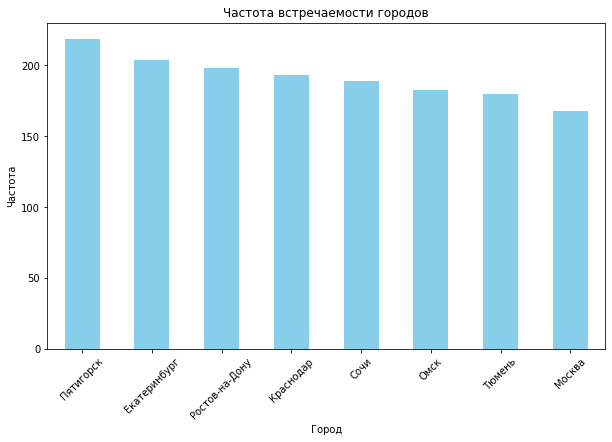

In [17]:
city_counts = users['city'].value_counts()

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

**Анализ графика "Частота встречаемости городов"**

Основные выводы:

- Лидер по упоминаниям: Город Пятигорск имеет наибольшую частоту упоминаний среди представленных городов. Его столбец значительно выше остальных.
- Топ-3: Следующими по частоте упоминаний идут Екатеринбург и Ростов-на-Дону. Их столбцы также имеют значительную высоту.
- Остальные города: Остальные города (Краснодар, Сочи, Омск, Тюмень, Москва) имеют примерно одинаковую частоту упоминаний, которая заметно ниже, чем у лидеров.
- Различия в частоте: Существует существенная разница в частоте упоминаний между лидерами и остальными городами.

**3.2 соотношение пользователей с подпиской и без подписки:**

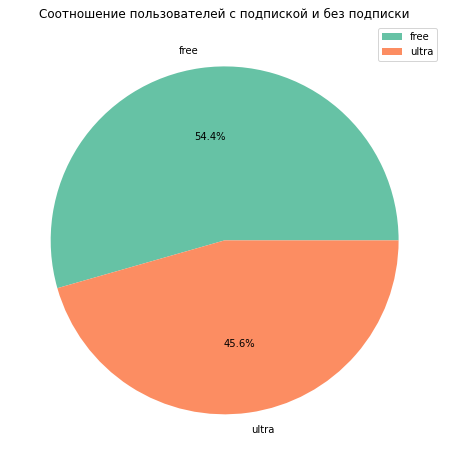

In [18]:
# Соотношение пользователей с подпиской и без подписки
subscription_counts = users['subscription_type'].value_counts()

# Визуализация
plt.figure(figsize=(8, 8))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'), legend=True)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')  # Убираем ярлык с оси Y
plt.show()

**Анализ круговой диаграммы соотношения пользователей с подпиской и без подписки:**
- Преобладание бесплатной подписки: Большинство пользователей (54,4%) выбрали бесплатную версию продукта. Это говорит о том, что бесплатная модель подписки является более привлекательной для пользователей.
- Популярность премиум-подписки: Несмотря на меньшую долю, премиум-подписка также пользуется значительным спросом (45,6%). Это свидетельствует о том, что часть пользователей готова платить за дополнительные функции или услуги.

**3.3 возраст пользователей:**

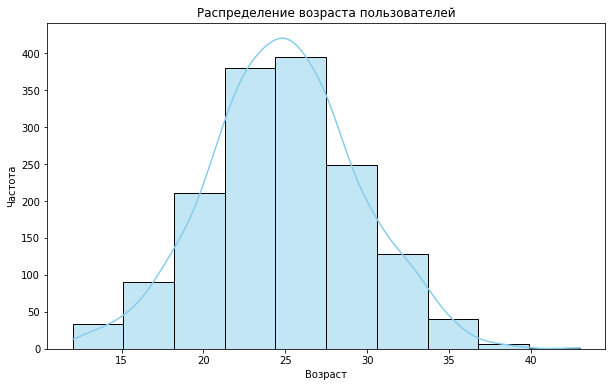

In [19]:
# Возраст пользователей
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=10, kde=True, color='skyblue')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

**Анализ графика распределения возраста пользователей:**

Основные выводы:
- Нормальное распределение: Форма гистограммы близка к нормальному распределению. Это означает, что большинство пользователей сосредоточено вокруг среднего значения возраста, а количество пользователей с возрастом, значительно отклоняющимся от среднего, уменьшается.
- Средний возраст: Средний возраст пользователей, судя по графику, находится в диапазоне 22-27 лет. Точное значение можно рассчитать, но визуально пик распределения приходится на этот интервал.
- Дисперсия: Дисперсия возраста относительно небольшая. Большинство пользователей находятся в довольно узком возрастном диапазоне.

**3.4 расстояние, которое пользователь преодолел за одну поездку:**

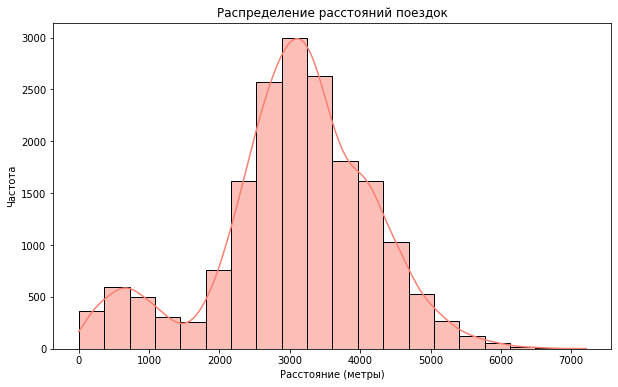

In [20]:
# Расстояние, которое пользователь преодолел за одну поездку
plt.figure(figsize=(10, 6))
sns.histplot(rides['distance'], bins=20, kde=True, color='salmon')
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Частота')

plt.show()

**Анализ графика распределения растояний поездок:**

Основные выводы:

- Двухмодальное распределение: На графике отчетливо видны два пика, что свидетельствует о наличии двух основных групп пользователей с различными поведением в плане длительности поездок.
- Гетерогенность пользователей: Пользователи сервиса не являются однородной группой. Существуют четкие различия в поведении пользователей в зависимости от длительности поездок.
- Мода: Наиболее часто встречающиеся расстояния поездок находятся в 3000 метров. Именно в этом интервале наблюдается наибольшее количество поездок.
- Длинный правый хвост: График имеет длинный правый хвост, что указывает на наличие небольшого количества поездок очень большой длины. Это могут быть, например, поездки за город.
- Необходимость сегментации: Для более эффективной работы с пользователями необходимо провести сегментацию по длительности поездок и разработать для каждой группы индивидуальные предложения.

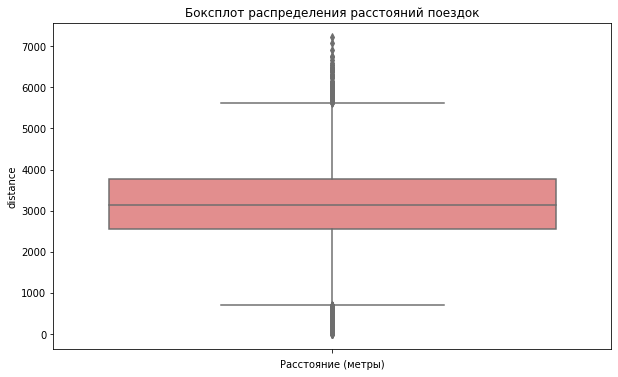

In [21]:
# График распределения расстояний поездок (Боксплот)
plt.figure(figsize=(10, 6))
sns.boxplot(y=rides['distance'], color='lightcoral')
plt.title('Боксплот распределения расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.show()

- Большинство поездок имеют длину около 3000 метров.
- Есть значительное количество коротких и длинных поездок, которые можно считать выбросами. Это может указывать на то, что данные содержат различные типы поездок, например, короткие поездки по городу и длительные поездки за город.
- Распределение не является симметричным. Наличие большого количества выбросов с длинными расстояниями говорит о положительной асимметрии.

**3.5 продолжительность поездок:**

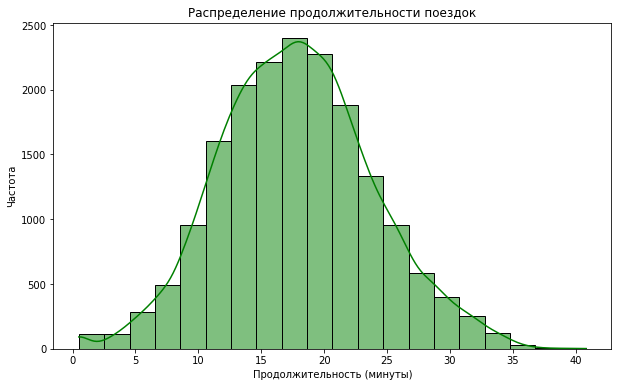

In [22]:
# 3.5 Продолжительность поездок
plt.figure(figsize=(10, 6))
sns.histplot(rides['duration'], bins=20, kde=True, color='green')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Частота')
plt.show()

**Анализ графика распределения продолжительности поездок:**

Основные выводы:

- Нормальное распределение: Форма гистограммы близка к нормальному распределению. Это означает, что большинство поездок имеют среднюю продолжительность, а количество очень коротких или очень длинных поездок значительно меньше.
- Средняя продолжительность: Средняя продолжительность поездок, судя по графику, находится в диапазоне 15-22 минут. Точное значение можно рассчитать, но визуально пик распределения приходится на этот интервал.
- Дисперсия: Дисперсия продолжительности относительно небольшая. Большинство поездок имеют схожую продолжительность.

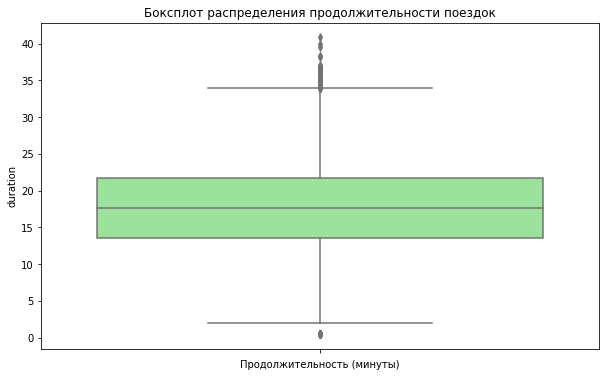

In [23]:
# График распределения продолжительности поездок (Боксплот)
plt.figure(figsize=(10, 6))
sns.boxplot(y=rides['duration'], color='lightgreen')
plt.title('Боксплот распределения продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.show()

- Большинство поездок длится около 18 минут.
- Есть значительное количество коротких и длинных поездок, которые можно считать выбросами. Это может указывать на то, что данные содержат различные типы поездок, например, короткие поездки по городу и длительные поездки за город.
- Распределение не является симметричным. Наличие большого количества выбросов с длинными поездками говорит о положительной асимметрии.


#### Шаг 4. Объединение данных

In [24]:
# 1. Размеры исходных датафреймов до объединения
print(f"Размер исходного датафрейма 'users': {users.shape}")
print(f"Размер исходного датафрейма 'rides': {rides.shape}")
print(f"Размер исходного датафрейма 'subscriptions': {subscriptions.shape}")
print()

Размер исходного датафрейма 'users': (1534, 5)
Размер исходного датафрейма 'rides': (18068, 5)
Размер исходного датафрейма 'subscriptions': (2, 4)



- Количество строк в `rides` больше по сравнению с `users`, что указывает на то, что некоторые пользователи имели несколько записей о поездках.

In [25]:
# 4.1 Объединение данных о пользователях, поездках и подписках
user_rides_subscriptions = (
    pd.merge(users, rides, on='user_id', how='inner')
    .merge(subscriptions, on='subscription_type', how='left')
)

f"Размер объединенного датафрейма 'user_rides_subscriptions': {user_rides_subscriptions.shape}"

"Размер объединенного датафрейма 'user_rides_subscriptions': (18068, 12)"

In [26]:
# Проверка уникальности значений в ключевых столбцах
print("Уникальные значения в 'user_id':", user_rides_subscriptions['user_id'].nunique())
print("Уникальные значения в 'subscription_type':", user_rides_subscriptions['subscription_type'].nunique())
print("Количество уникальных пар 'user_id' и 'subscription_type':", user_rides_subscriptions[['user_id', 'subscription_type']].drop_duplicates().shape[0])

Уникальные значения в 'user_id': 1534
Уникальные значения в 'subscription_type': 2
Количество уникальных пар 'user_id' и 'subscription_type': 1534


Объединение прошло корректно, и каждый пользователь имеет правильный тип подписки, что подтверждается уникальностью комбинации `user_id` и `subscription_type`.

In [27]:
# Проверка количества записей о поездках для каждого пользователя
rides_per_user = user_rides_subscriptions.groupby('user_id').size()
rides_per_user.describe()

count    1534.000000
mean       11.778357
std         4.157738
min         2.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        27.000000
dtype: float64

Среднее количество поездок:
- В среднем, каждый пользователь сделал около 12 поездок, что выглядит разумно для анализа.

Разброс количества поездок:
- Стандартное отклонение и размах (от 2 до 42 поездок) указывают на то, что есть пользователи с малым и большим числом поездок. Это нормально, так как поведение пользователей может сильно различаться.

In [28]:
user_rides_subscriptions.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [29]:
# 4.2 Создание датафрейма с данными о пользователях без подписки
no_subscription_df = user_rides_subscriptions[user_rides_subscriptions['subscription_type'] == 'free']
no_subscription_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [30]:
# 4.2 Создание датафрейма с данными о пользователях с подпиской
subscription_df = user_rides_subscriptions[user_rides_subscriptions['subscription_type'] == 'ultra']
subscription_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


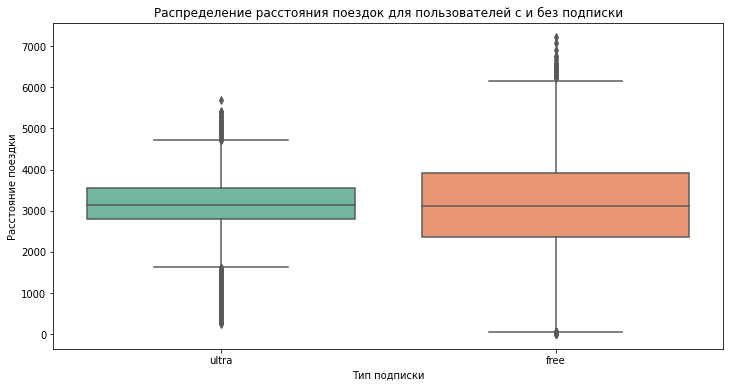

In [31]:
# Cоздание сводной таблицы для средних значений расстояния поездок
pivot_distance = user_rides_subscriptions.pivot_table(index='subscription_type', values='distance', aggfunc='mean').reset_index()

# 4.3 Визуализация расстояния поездок с использованием диаграммы размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x='subscription_type', y='distance', data=user_rides_subscriptions, palette='Set2')
plt.title('Распределение расстояния поездок для пользователей с и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Расстояние поездки')
plt.show()

**Основные выводы по представленной диаграмме:**
- Различие в средних значениях: Пользователи с бесплатной подпиской `free` в среднем совершают более длительные поездки по сравнению с пользователями с премиальной подпиской `ultra`. Это видно по тому, что "ящик" для категории `free` расположен выше по оси Y.
- Размах значений: Диапазон расстояний поездок для обеих категорий пользователей довольно широкий, о чем свидетельствуют длинные "усы" диаграммы. Однако, у пользователей с бесплатной подпиской наблюдается большее количество очень длинных поездок (выбросы в верхней части диаграммы).
- Квартили: Медиана (средняя линия внутри ящика) и квартили (границы ящика) совпадают в распределении данных для двух категорий. У пользователей с бесплатной подпиской значения верхнего квартиля выше, что подтверждает более длительные поездки в среднем.

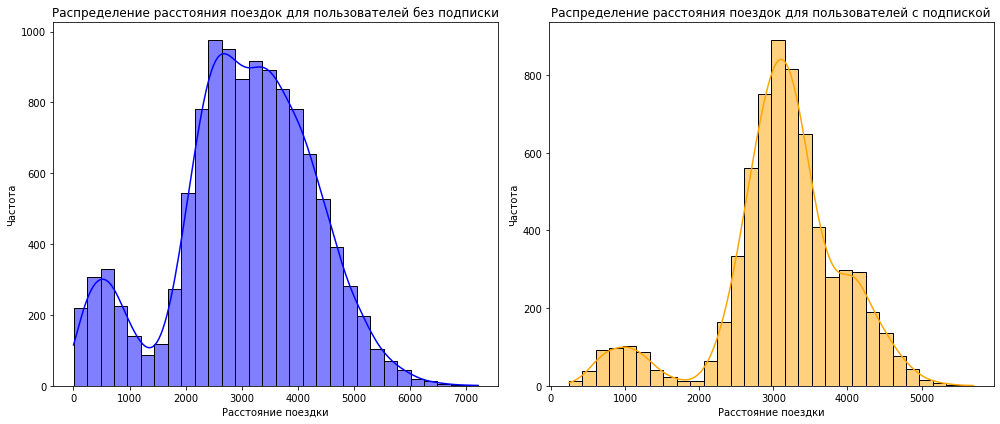

In [32]:
# Установка размера фигуры для гистограмм
plt.figure(figsize=(14, 6))

# Гистограмма для пользователей без подписки
plt.subplot(1, 2, 1)
sns.histplot(no_subscription_df['distance'], bins=30, kde=True, color='blue')
plt.title('Распределение расстояния поездок для пользователей без подписки')
plt.xlabel('Расстояние поездки')
plt.ylabel('Частота')

# Гистограмма для пользователей с подпиской
plt.subplot(1, 2, 2)
sns.histplot(subscription_df['distance'], bins=30, kde=True, color='orange')
plt.title('Распределение расстояния поездок для пользователей с подпиской')
plt.xlabel('Расстояние поездки')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Основные наблюдения:**

- Двухмодальное распределение: Обе гистограммы демонстрируют двухмодальное распределение. Это свидетельствует о наличии двух основных групп пользователей с разными поведением в плане длительности поездок.

Различия между группами:
- Пользователи без подписки: Характеризуются более широким диапазоном расстояний поездок и более выраженным вторым пиком в области длинных дистанций. Первый пик, соответствующий коротким поездкам, менее выражен. Это может указывать на то, что пользователи без подписки используют сервис как для коротких поездок по городу, так и для более длительных маршрутов.
- Пользователи с подпиской: В основном совершают поездки средней длины, что отражается в более узком и смещенном влево основном пике. Это свидетельствует о более стабильном поведении пользователей с подпиской и, возможно, о том, что они чаще используют сервис для длительных перемещений.

In [33]:
display(no_subscription_df['distance'].describe())
display(subscription_df['distance'].describe())

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Описание данных:
- Среднее значение: Несмотря на то, что на графике визуально казалось, что пользователи без подписки совершают более длительные поездки, численные данные показывают, что среднее значение расстояния для пользователей с подпиской немного выше. Однако, разница не является существенной и может быть связана с небольшими колебаниями данных.
- Стандартное отклонение: Стандартное отклонение у пользователей без подписки значительно выше, что говорит о большем разбросе в длительности их поездок. Это означает, что среди пользователей без подписки есть как очень короткие, так и очень длинные поездки. У пользователей с подпиской распределение более сконцентрировано вокруг среднего значения.
- Медиана: Медиана для обеих групп практически одинакова, что подтверждает, что в целом средняя длительность поездок для обеих групп сопоставима.
- Экстремальные значения: Минимальное значение для пользователей без подписки значительно ниже, что говорит о наличии очень коротких поездок. Максимальное значение у пользователей без подписки также выше, что указывает на наличие очень длинных поездок.

Вывод:
- Нет существенной разницы в средней длительности поездок: На основе предоставленных данных мы не можем утверждать, что пользователи с одной из подписок совершают значительно более длительные поездки, чем пользователи другой.
- Различия в распределении: Несмотря на схожесть средних значений, распределения данных для двух групп отличаются. У пользователей без подписки наблюдается больший разброс в длительности поездок, что говорит о большей неоднородности этой группы.


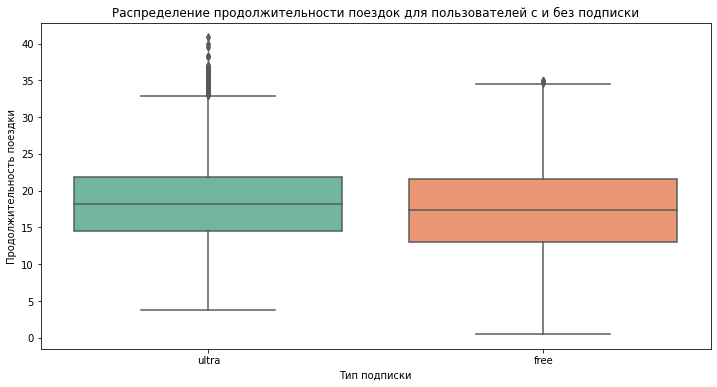

In [34]:
# Создание сводной таблицы для средних значений продолжительности поездок
pivot_duration = user_rides_subscriptions.pivot_table(index='subscription_type', values='duration', aggfunc='mean').reset_index()

# Визуализация продолжительности поездок с использованием диаграммы размаха
plt.figure(figsize=(12, 6))
sns.boxplot(x='subscription_type', y='duration', data=user_rides_subscriptions, palette='Set2')
plt.title('Распределение продолжительности поездок для пользователей с и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Продолжительность поездки')
plt.show()

- Медиана: Медиана для обеих групп достаточно близка, что подтверждает схожую среднюю продолжительность поездок для обеих групп.
- Экстремальные значения: Минимальное значение у пользователей без подписки значительно ниже, что говорит о наличии очень коротких поездок. Максимальное значение у пользователей с подпиской немного выше. 

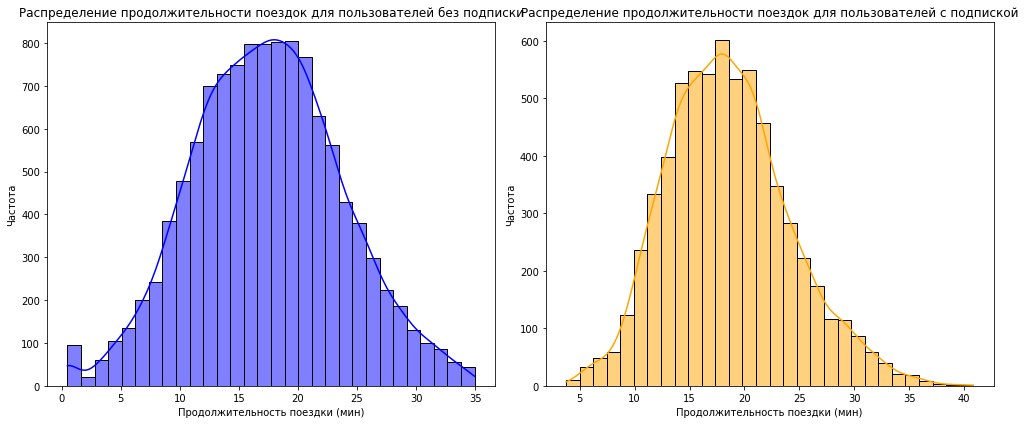

In [35]:
# Установка размера фигуры для гистограмм
plt.figure(figsize=(14, 6))

# Гистограмма для пользователей без подписки
plt.subplot(1, 2, 1)
sns.histplot(no_subscription_df['duration'], bins=30, kde=True, color='blue')
plt.title('Распределение продолжительности поездок для пользователей без подписки')
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Частота')

# Гистограмма для пользователей с подпиской
plt.subplot(1, 2, 2)
sns.histplot(subscription_df['duration'], bins=30, kde=True, color='orange')
plt.title('Распределение продолжительности поездок для пользователей с подпиской')
plt.xlabel('Продолжительность поездки (мин)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Общие выводы:**

- Гистограммы демонстрируют два разных распределения продолжительности поездок для пользователей с подпиской и без.
- Разная форма распределения: Обе группы демонстрируют положительную асимметрию, то есть длинный правый хвост. Это означает, что есть небольшое количество очень длинных поездок, которые влияют на среднее значение.

Различия между группами:
- Пользователи без подписки: Распределение более разбросанное. Это свидетельствует о большей вариативности в продолжительности поездок для этой группы пользователей.
- Пользователи с подпиской: Распределение более сконцентрировано вокруг среднего значения, с менее выраженным правым хвостом.  Средние значения обоих групп схожи.  Правый хвост у распределения продолжительности поездок для пользователей с подпиской чуть длиннее. Это значит, что у этой группы пользователей есть больше поездок длительностью выше среднего значения, чем у пользователей без подписки. 

In [36]:
display(no_subscription_df['duration'].describe())
display(subscription_df['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

- Среднее значение: На основе количественных данных можно сделать вывод, что средняя продолжительность поездок для пользователей с подпиской и без нее практически одинакова.
- Стандартное отклонение: Стандартное отклонение у пользователей без подписки несколько выше, что указывает на больший разброс в продолжительности их поездок.
- У пользователей с подпиской есть больше поездок длительностью выше среднего значения, чем у пользователей без подписки.

In [37]:
# Проверка на пропуски в исходных данных
user_rides_subscriptions.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [38]:
# Округление продолжительности каждой поездки до следующей целой минуты
user_rides_subscriptions['duration'] = np.ceil(user_rides_subscriptions['duration'])

# 5.1 Создание агрегированного датафрейма с суммарным расстоянием, суммарным временем и количеством поездок
aggregated_data = user_rides_subscriptions.pivot_table(
    index=['user_id', 'month'], 
    values=['distance', 'duration'], 
    aggfunc={'distance': 'sum', 'duration': 'sum', 'user_id': 'count'}
).rename(columns={'user_id': 'trips_count'}).reset_index()

# Округление продолжительности поездок до следующего целого числа
aggregated_data['duration'] = np.ceil(aggregated_data['duration'])

aggregated_data

,user_id,month,distance,duration,trips_count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3
...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2
11327,1534,8,7622.453034,48.0,2
11328,1534,9,4928.173852,23.0,1
11329,1534,11,13350.015305,78.0,4


In [39]:
aggregated_data = pd.merge(aggregated_data, user_rides_subscriptions[['user_id', 'month', 'subscription_type', 'start_ride_price', 'minute_price', 'subscription_fee']], on=['user_id', 'month'], how='left')


In [40]:
# 5.2 Рассчет помесячной выручки
aggregated_data['monthly_revenue'] = (
    aggregated_data['start_ride_price'] * aggregated_data['trips_count'] +
    aggregated_data['minute_price'] * aggregated_data['duration'] +
    aggregated_data['subscription_fee']
)

aggregated_data

,user_id,month,distance,duration,trips_count,subscription_type,start_ride_price,minute_price,subscription_fee,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,0,6,199,451.0
1,1,1,7027.511294,42.0,2,ultra,0,6,199,451.0
2,1,4,754.159807,7.0,1,ultra,0,6,199,241.0
3,1,8,6723.470560,46.0,2,ultra,0,6,199,475.0
4,1,8,6723.470560,46.0,2,ultra,0,6,199,475.0
...,...,...,...,...,...,...,...,...,...,...
18063,1534,11,13350.015305,78.0,4,free,50,8,0,824.0
18064,1534,11,13350.015305,78.0,4,free,50,8,0,824.0
18065,1534,11,13350.015305,78.0,4,free,50,8,0,824.0
18066,1534,11,13350.015305,78.0,4,free,50,8,0,824.0


In [41]:
user_rides_subscriptions.duplicated().sum()

0

In [42]:
aggregated_data.duplicated().sum()

6737

Если данные объединяются несколько раз, это может привести к дублированию строк, особенно если объединение выполняется с использованием `how='left'`, как выше.

In [43]:
# Удаление дубликатов
aggregated_data = aggregated_data.drop_duplicates()
aggregated_data.duplicated().sum()

0

In [44]:
aggregated_data

,user_id,month,distance,duration,trips_count,subscription_type,start_ride_price,minute_price,subscription_fee,monthly_revenue
0,1,1,7027.511294,42.0,2,ultra,0,6,199,451.0
2,1,4,754.159807,7.0,1,ultra,0,6,199,241.0
3,1,8,6723.470560,46.0,2,ultra,0,6,199,475.0
5,1,10,5809.911100,32.0,2,ultra,0,6,199,391.0
7,1,11,7003.499363,56.0,3,ultra,0,6,199,535.0
...,...,...,...,...,...,...,...,...,...,...
18058,1534,6,3409.468534,26.0,2,free,50,8,0,308.0
18060,1534,8,7622.453034,48.0,2,free,50,8,0,484.0
18062,1534,9,4928.173852,23.0,1,free,50,8,0,234.0
18063,1534,11,13350.015305,78.0,4,free,50,8,0,824.0


#### Шаг 6. Проверка гипотез

**6.1** Для проверки гипотезы о том, тратят ли пользователи с подпиской больше времени на поездки, можно воспользоваться t-тестом для независимых выборок. Он позволит сравнить среднее время поездок двух групп: пользователей с подпиской и без неё.

Формулировка гипотез:
- Нулевая гипотеза (H₀): Среднее время поездок пользователей с подпиской не отличается от времени поездок пользователей без подписки.
- Альтернативная гипотеза (H₁): Среднее время поездок пользователей с подпиской больше, чем у пользователей без подписки.

In [45]:
# Выборки продолжительности поездок
subscribed_duration = subscription_df['duration']
non_subscribed_duration = no_subscription_df['duration']

In [46]:
# Сравнение дисперсий
var_subscribed = np.var(subscribed_duration, ddof=1)
var_non_subscribed = np.var(non_subscribed_duration, ddof=1)

# Сравнение дисперсий
'Дисперсии не равны' if var_subscribed != var_non_subscribed else 'Дисперсии равны'

'Дисперсии не равны'

In [47]:
# Сравнение размеров выборок
size_subscribed = len(subscribed_duration)
size_non_subscribed = len(non_subscribed_duration)

'Размеры выборок не равны' if size_subscribed != size_non_subscribed  else 'Размеры выборок'

'Размеры выборок не равны'

In [48]:
# Проведение t-теста, если выборки разного размера или дисперсии разные
t_test_result = stats.ttest_ind(subscribed_duration, non_subscribed_duration, equal_var=False, alternative='greater')

# Уровень значимости
alpha = 0.05

# Логика для проверки p-value
result = (
    "Отклоняем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки."
    if t_test_result.pvalue < alpha
    else "Не отклоняем нулевую гипотезу: среднее время поездок не отличается между пользователями с подпиской и без."
)

# Вывод p-value и результата теста
print(f"p-value: {t_test_result.pvalue}")
print(result)

p-value: 5.6757813771289775e-37
Отклоняем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.


**6.2** Задачу можно сформулировать как проверку гипотезы о том, что среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров. Это задача на односторонний t-тест для средних значений. 

Гипотезы:
- Нулевая гипотеза (H₀): Среднее расстояние за одну поездку пользователей с подпиской не превышает 3130 метров, то есть 𝜇≤3130.
- Альтернативная гипотеза (H₁): Среднее расстояние за одну поездку пользователей с подпиской больше 3130 метров, то есть μ>3130.

In [49]:
# Извлечение данных о расстоянии поездок для пользователей с подпиской
subscribed_distance = subscription_df['distance']

# Среднее значение, с которым сравниваем
optimal_distance = 3130

# Проведение одностороннего t-теста (alternative='greater' для проверки превышения)
t_test_result = stats.ttest_1samp(subscribed_distance, optimal_distance, alternative='greater')

# Уровень значимости
alpha = 0.05

# Вывод результата
if t_test_result.pvalue < alpha:
    result = "Отклоняем нулевую гипотезу: пользователи с подпиской проезжают больше 3130 метров за одну поездку."
else:
    result = "Не отклоняем нулевую гипотезу: среднее расстояние пользователей с подпиской не превышает 3130 метров."

# Вывод p-value и результата теста
print(f"p-value: {t_test_result.pvalue}")
print(result)

p-value: 0.9195368847849785
Не отклоняем нулевую гипотезу: среднее расстояние пользователей с подпиской не превышает 3130 метров.


**6.3** Для проверки гипотезы о том, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки, можно использовать t-тест для независимых выборок.

Гипотезы:
- Нулевая гипотеза (H₀): Средняя помесячная выручка от пользователей с подпиской не больше, чем от пользователей без подписки, то есть 𝜇 (subscribed) ≤ 𝜇 (non-subscribed).
- Альтернативная гипотеза (H₁): Средняя помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки, то есть 𝜇 (subscribed) > 𝜇 (non-subscribed).

In [50]:
# Извлечение помесячной выручки
subscribed_revenue = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_revenue']
non_subscribed_revenue = aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_revenue']

# Проведение t-теста для независимых выборок
t_test_result = stats.ttest_ind(subscribed_revenue, non_subscribed_revenue, equal_var=False, alternative='greater')

# Уровень значимости
alpha = 0.05

# Вывод результата
if t_test_result.pvalue < alpha:
    result = "Отклоняем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки."
else:
    result = "Не отклоняем нулевую гипотезу: помесячная выручка от пользователей с подпиской не выше, чем выручка от пользователей без подписки."

# Вывод p-value и результата теста
print(f"p-value: {t_test_result.pvalue}")
print(result)

p-value: 8.874140893976874e-40
Отклоняем нулевую гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.


**6.4** В ситуации, когда требуется проверить, произошло ли значительное снижение количества обращений в техподдержку после обновления серверов, потребуется тест, который может сравнить данные двух связанных выборок: количество обращений до обновления и после обновления для каждого пользователя. Для этого подойдет парный t-тест, который предназначен для сравнения двух связанных выборок.

Гипотезы:
- Нулевая гипотеза (H₀): Среднее количество обращений до обновления равно среднему количеству обращений после обновления. То есть разница между средними значениями равна нулю.
- Альтернативная гипотеза (H₁): Среднее количество обращений до обновления не равно среднему количеству обращений после обновления. То есть разница между средними значениями не равна нулю.

In [51]:
# Проведение парного t-теста
t_test_result = stats.ttest_rel(before_update, after_update)

# Уровень значимости
alpha = 0.05

# Вывод результата
if t_test_result.pvalue < alpha:
    result = "Отклоняем нулевую гипотезу: количество обращений в техподдержку значительно снизилось после обновления."
else:
    result = "Не отклоняем нулевую гипотезу: количество обращений в техподдержку не снизилось значительно после обновления."

NameError: name 'before_update' is not defined

**Итоговый вывод**
1. Среднее время поездок пользователей с подпиской:
- Гипотеза: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- Результат: Отклоняем нулевую гипотезу. p-value = 5.68e-37, что значительно меньше уровня значимости α = 0.05.
- Вывод: Пользователи с подпиской действительно тратят больше времени на поездки по сравнению с пользователями без подписки. Это может свидетельствовать о том, что они используют сервис более активно или для более длительных поездок.

2. Среднее расстояние поездок пользователей с подпиской:
- Гипотеза: Среднее расстояние за одну поездку пользователей с подпиской превышает 3130 метров.
- Результат: Не отклоняем нулевую гипотезу. p-value = 0.92, что больше уровня значимости α = 0.05.
- Вывод: Среднее расстояние поездок пользователей с подпиской не превышает 3130 метров. Это может означать, что пользователи с подпиской не совершают значительно более длинные поездки по сравнению с установленным порогом.

3. Помесячная выручка от пользователей с подпиской:
- Гипотеза: Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
- Результат: Отклоняем нулевую гипотезу. p-value = 8.87e-40, что значительно меньше уровня значимости α = 0.05.
- Вывод: Помесячная выручка от пользователей с подпиской значительно выше, чем у пользователей без подписки. Это подтверждает, что подписка является более прибыльной для компании.

**Рекомендации для бизнеса**

- Увеличение маркетинга и продвижения подписки: учитывая, что пользователи с подпиской тратят больше времени на поездки и приносят больше выручки, стоит усилить маркетинговые усилия по привлечению новых подписчиков и поощрению существующих пользователей для продления подписки.
- Фокус на дополнительных источниках дохода: исследовать возможности для увеличения дохода от пользователей, которые не используют подписку, например, через предложения дополнительных услуг или одноразовых оплат за поездки.
- Анализ использования сервиса: провести более детальный анализ продолжительности и расстояния поездок, чтобы лучше понять поведение подписчиков и предложить дополнительные опции или улучшения сервиса, соответствующие их потребностям.

#### Шаг 7. Распределения